# Salary Problem

# Problem 1 - One Way ANOVA

# Q1)-A)

In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [249]:
df = pd.read_csv('SalaryData.csv')


In [250]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [251]:
df.tail()


,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


In [252]:
df.describe(include='all')

,Education,Occupation,Salary
count,40,40,40.000000
unique,3,4,NaN
top,Doctorate,Prof-specialty,NaN
freq,16,13,NaN
mean,NaN,NaN,162186.875000
std,NaN,NaN,64860.407506
min,NaN,NaN,50103.000000
25%,NaN,NaN,99897.500000
50%,NaN,NaN,169100.000000
75%,NaN,NaN,214440.750000


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [31]:
df.shape

(40, 3)

In [254]:
df['Education']= pd.Categorical(df['Education'])


In [255]:
df['Occupation']= pd.Categorical(df['Occupation'])

In [256]:
df.Education.value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [260]:
df.Occupation.value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

# Q1.2).

In [259]:
formula1 = 'Salary ~ C(Education)'
model = ols(formula1, df).fit()
aov_table1 = anova_lm(model)
(aov_table1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


# Q1.3)

In [258]:
formula2 = 'Salary ~ C(Occupation)'
model = ols(formula2, df).fit()
aov_table2 = anova_lm(model)
(aov_table2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


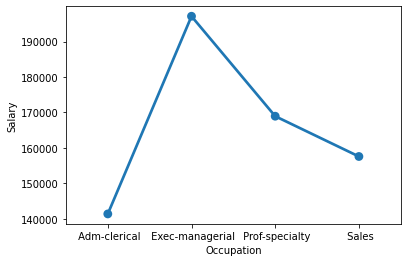

In [261]:
sns.pointplot(x='Occupation', y='Salary', data=df, ci=None)

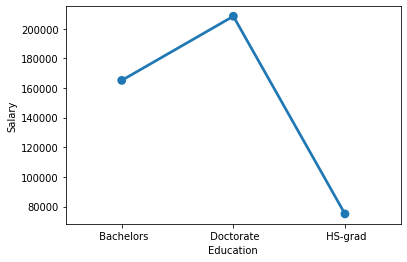

In [262]:
sns.pointplot(x='Education', y='Salary', data=df, ci=None)

# Q1.4).

In [263]:
compare = MultiComparison (df['Salary'], df['Education'])
result = compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


# Q1.5).

In [43]:
formula3 = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
Occupation,3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [19]:
formula = 'Salary ~ C(Occupation) + C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,2.284576,9.648715e-02
C(Education),2.0,9.695663e+10,4.847831e+10,29.510933,3.708479e-08
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


In [20]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


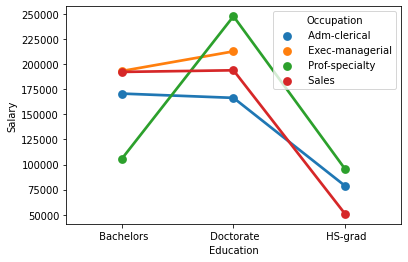

In [264]:
sns.pointplot(x='Education', y='Salary', data=df, hue='Occupation',ci=None);

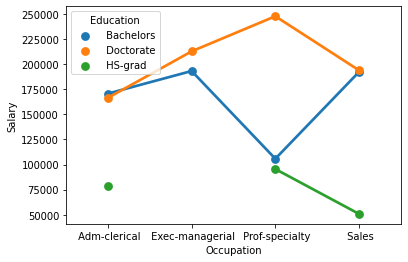

In [265]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

# Q1.6).

In [69]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


# Pricipal Component Analysis

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA 
import warnings
warnings.filterwarnings("ignore")

In [85]:
df=pd.read_csv('Education+-+Post+12th+Standard.csv')

In [86]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [87]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Names,777,777,Rhodes College,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apps,777,NaN,NaN,NaN,3001.64,3870.2,81,776,1558,3624,48094
Accept,777,NaN,NaN,NaN,2018.8,2451.11,72,604,1110,2424,26330
Enroll,777,NaN,NaN,NaN,779.973,929.176,35,242,434,902,6392
Top10perc,777,NaN,NaN,NaN,27.5586,17.6404,1,15,23,35,96
Top25perc,777,NaN,NaN,NaN,55.7967,19.8048,9,41,54,69,100
F.Undergrad,777,NaN,NaN,NaN,3699.91,4850.42,139,992,1707,4005,31643
P.Undergrad,777,NaN,NaN,NaN,855.299,1522.43,1,95,353,967,21836
Outstate,777,NaN,NaN,NaN,10440.7,4023.02,2340,7320,9990,12925,21700
Room.Board,777,NaN,NaN,NaN,4357.53,1096.7,1780,3597,4200,5050,8124


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [96]:
print('**Number of duplicate Rows:**')
df.duplicated().sum()

**Number of duplicate Rows:**


0

# Q2.1)

In [90]:
sd=df.drop('Names', axis = 1)

In [91]:
sd

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [92]:
qd=df.drop('Names', axis = 1)

In [98]:
qd

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


# Univariate ANalysis

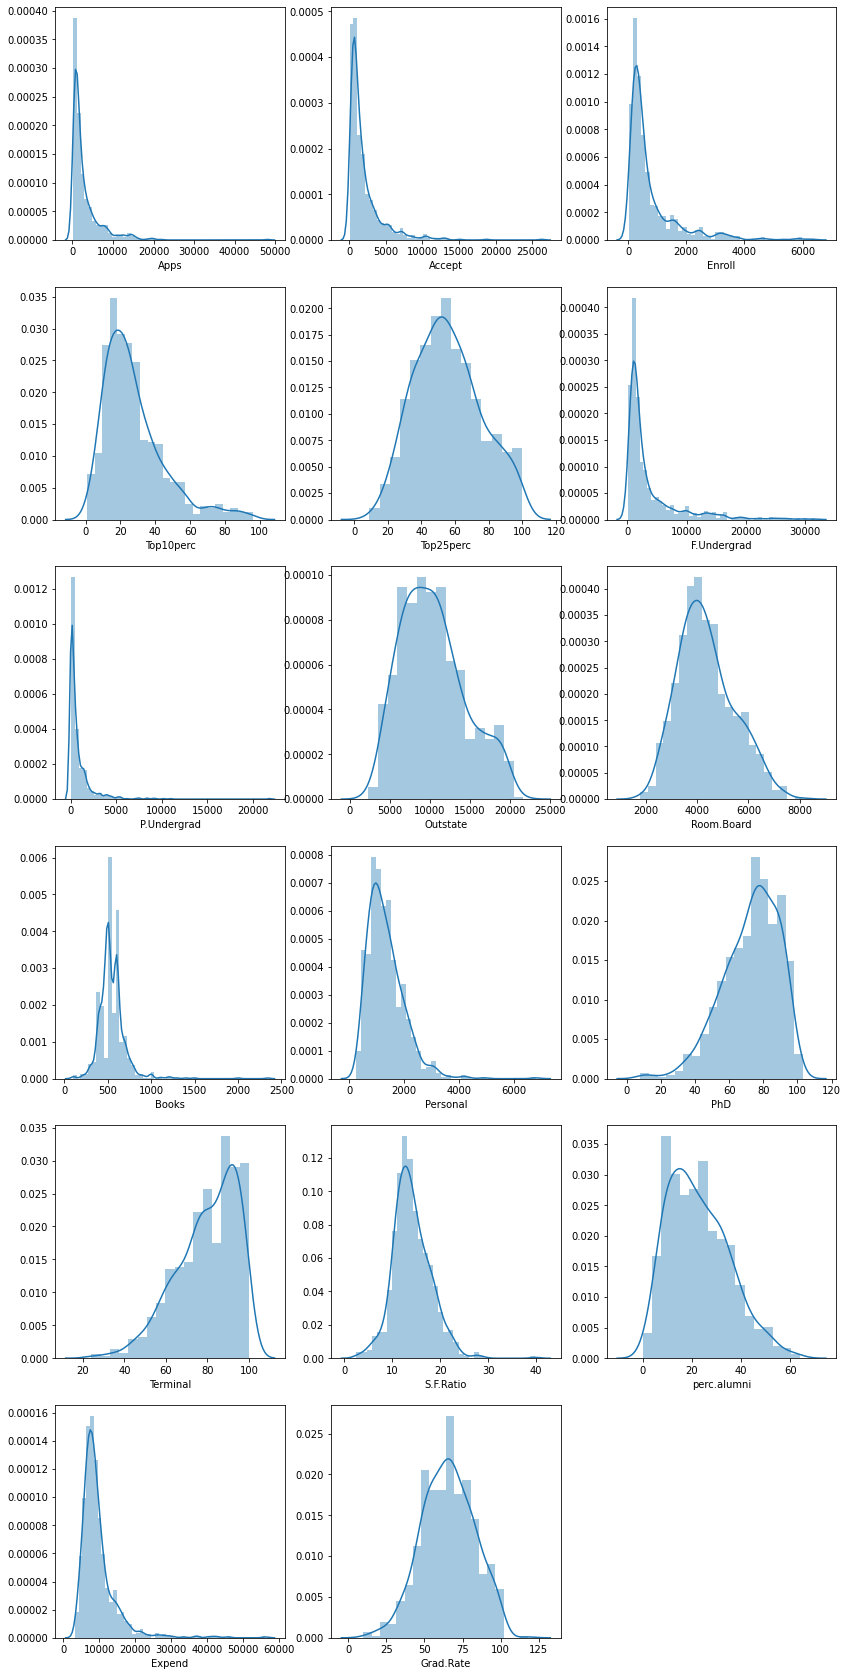

In [94]:
column_names = np.array(sd.columns.tolist())
plt.figure(figsize=(14,30))
for i in range(0,17):
    plt.subplot(6,3,i+1)
    sns.distplot(sd[column_names[i]])

In [103]:
df.skew().sort_values(ascending = False)

P.Undergrad    5.692353
Apps           3.723750
Books          3.485025
Expend         3.459322
Accept         3.417727
Enroll         2.690465
F.Undergrad    2.610458
Personal       1.742497
Top10perc      1.413217
S.F.Ratio      0.667435
perc.alumni    0.606891
Outstate       0.509278
Room.Board     0.477356
Top25perc      0.259340
Grad.Rate     -0.113777
PhD           -0.768170
Terminal      -0.816542
dtype: float64

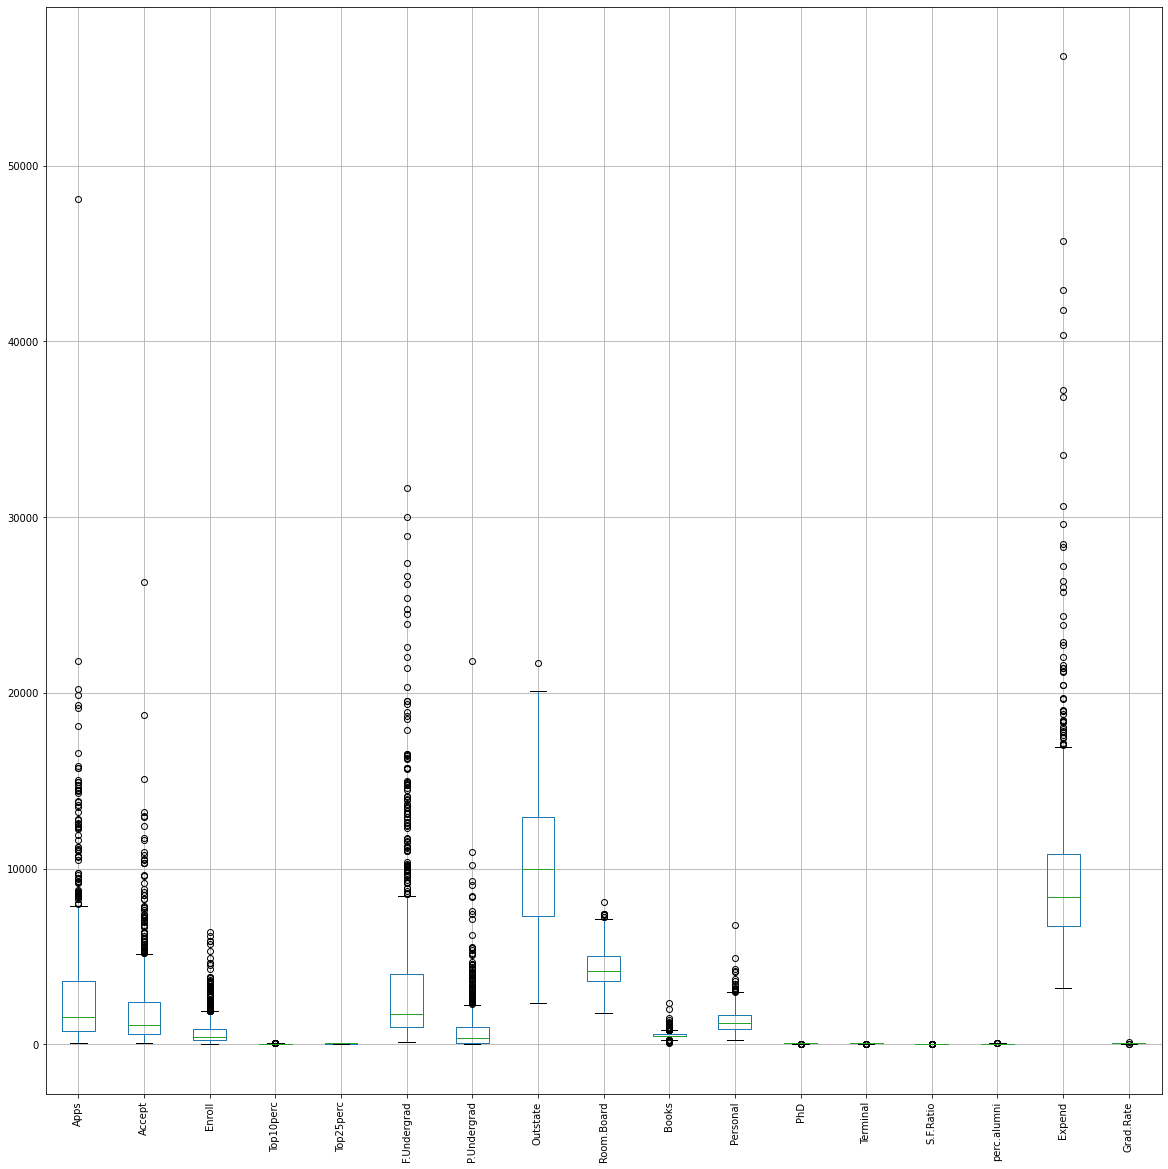

In [104]:
df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

# Bivariate ANalysis 

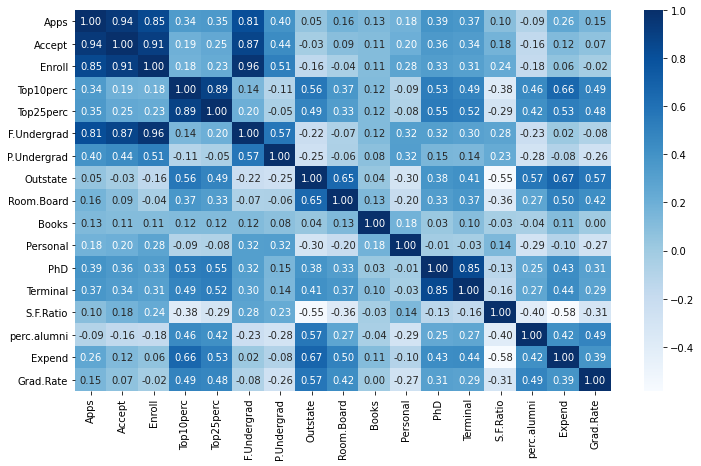

In [100]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

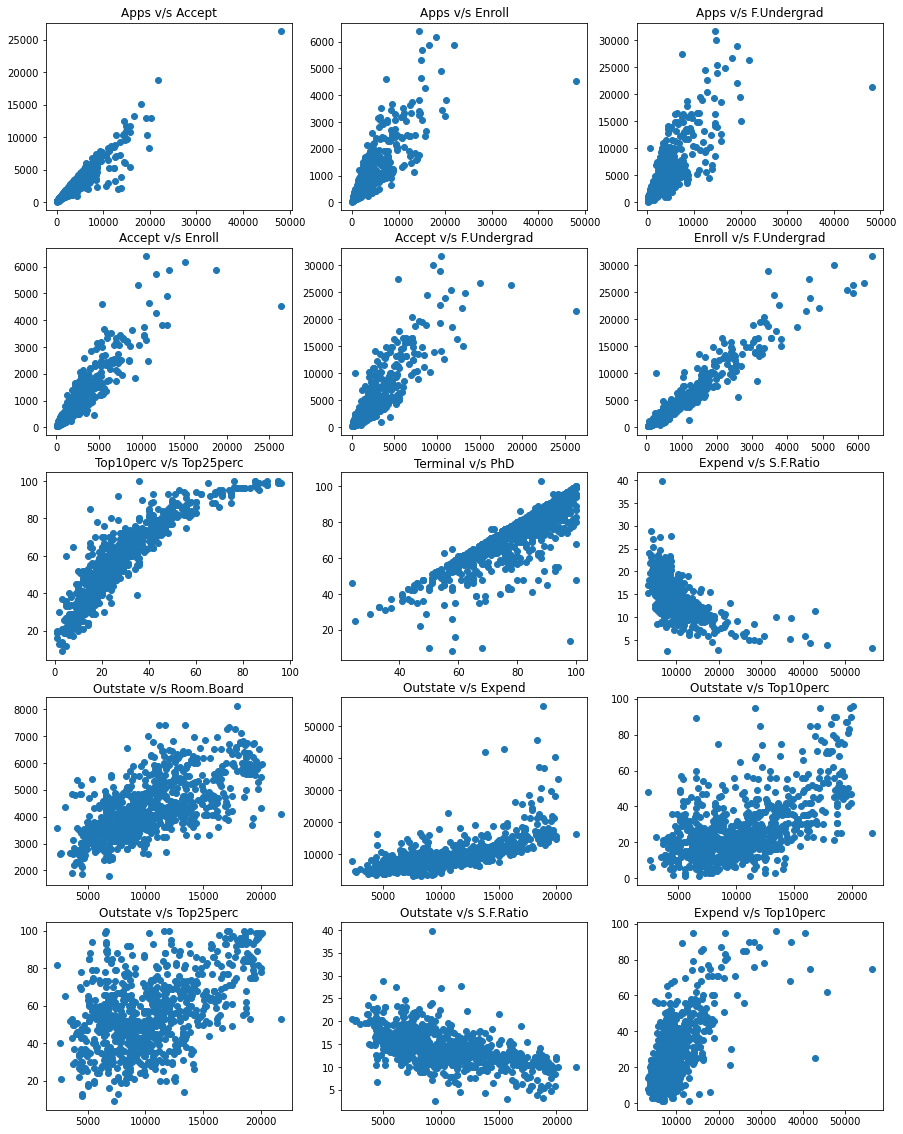

In [101]:
plt.figure(figsize=(15,20))
a = ['Apps','Apps','Apps', 'Accept', 'Accept', 'Enroll', 'Top10perc', 'Terminal',
              'Expend', 'Outstate','Outstate','Outstate','Outstate','Outstate','Expend' ]
b = ['Accept', 'Enroll', 'F.Undergrad', 'Enroll', 'F.Undergrad','F.Undergrad','Top25perc','PhD',
             'S.F.Ratio','Room.Board','Expend', 'Top10perc', 'Top25perc','S.F.Ratio','Top10perc']
count = 1
for i,j in zip(a,b):
    plt.subplot(5,3,count)
    plt.scatter(x = sd[i], y = sd[j])
    plt.title(str(i) + ' v/s ' + str (j))
    count = count + 1

# Q2.2).

In [122]:
from sklearn.preprocessing import StandardScaler
temp_scale_array = StandardScaler().fit_transform(qd)
zscaled = pd.DataFrame(temp_scale_array, columns = qd.columns)
zscaled.head().T

,0,1,2,3,4
Apps,-0.346882,-0.210884,-0.406866,-0.668261,-0.726176
Accept,-0.321205,-0.038703,-0.376318,-0.681682,-0.764555
Enroll,-0.063509,-0.288584,-0.478121,-0.692427,-0.780735
Top10perc,-0.258583,-0.655656,-0.315307,1.840231,-0.655656
Top25perc,-0.191827,-1.353911,-0.292878,1.677612,-0.596031
F.Undergrad,-0.168116,-0.209788,-0.549565,-0.658079,-0.711924
P.Undergrad,-0.209207,0.244307,-0.497090,-0.520752,0.009005
Outstate,-0.746356,0.457496,0.201305,0.626633,-0.716508
Room.Board,-0.964905,1.909208,-0.554317,0.996791,-0.216723
Books,-0.602312,1.215880,-0.905344,-0.602312,1.518912


In [139]:
zscaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,6.355797e-17,1.000644,-0.755134,-0.575441,-0.373254,0.160912,11.658671
Accept,777.0,6.774575e-17,1.000644,-0.794764,-0.577581,-0.371011,0.165417,9.924816
Enroll,777.0,-5.249269e-17,1.000644,-0.802273,-0.579351,-0.372584,0.131413,6.043678
Top10perc,777.0,-2.753232e-17,1.000644,-1.506526,-0.712380,-0.258583,0.422113,3.882319
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,-1.661405e-16,1.000644,-0.734617,-0.558643,-0.411138,0.062941,5.764674
P.Undergrad,777.0,-3.029180e-17,1.000644,-0.561502,-0.499719,-0.330144,0.073418,13.789921
Outstate,777.0,6.515595e-17,1.000644,-2.014878,-0.776203,-0.112095,0.617927,2.800531
Room.Board,777.0,3.570717e-16,1.000644,-2.351778,-0.693917,-0.143730,0.631824,3.436593
Books,777.0,-2.192583e-16,1.000644,-2.747779,-0.481099,-0.299280,0.306784,10.852297


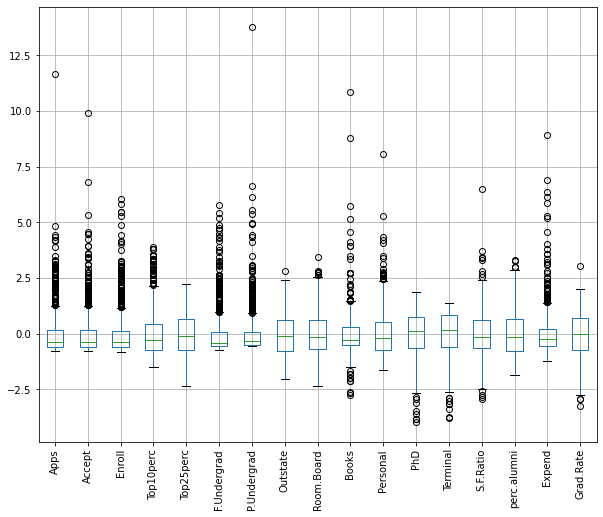

In [140]:
zscaled.boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

# If We Treat Outliers (NOT REQUIRED)

In [131]:
no_outlier =[]

In [132]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [133]:
outlier_list = [x for x in sd.columns if x not in no_outlier]

In [135]:
for i in sd[outlier_list]:    
    sd[i]=treat_outlier(sd[i])

In [136]:
from sklearn.preprocessing import StandardScaler
temp_scale_array = StandardScaler().fit_transform(sd)
zscale = pd.DataFrame(temp_scale_array, columns = sd.columns)
zscale.T

,0,1,2,3,4,5,6,7,8,9,...,767,768,769,770,771,772,773,774,775,776
Apps,-0.383829,-0.215156,-0.458225,-0.782423,-0.854253,-0.727909,-0.802946,-0.307189,-0.583286,-0.729512,...,-0.172186,-0.867401,-0.281535,-0.434816,-0.028526,-0.211629,-0.287948,-0.243696,2.632465,0.042343
Accept,-0.353198,0.003214,-0.422730,-0.807984,-0.912539,-0.741028,-0.812620,-0.101856,-0.555612,-0.731242,...,-0.058077,-0.921810,-0.092070,-0.506167,0.204082,-0.207440,-0.058077,-0.001422,0.275673,-0.032324
Enroll,-0.035012,-0.302696,-0.528115,-0.782992,-0.888017,-0.756096,-0.826539,-0.332155,-0.667721,-0.738165,...,0.026466,-0.862401,-0.222007,-0.608805,-0.084962,-0.262992,-0.068312,-0.068312,0.728339,-0.073435
Top10perc,-0.246782,-0.696287,-0.310997,2.129170,-0.696287,0.716442,-0.632072,0.652227,0.202722,-0.375212,...,-0.182567,-0.632072,0.973301,1.551236,1.422806,-1.466866,-0.182567,0.459582,2.450347,0.074292
Top25perc,-0.191827,-1.353911,-0.292878,1.677612,-0.596031,0.313426,-0.545505,0.616579,0.363952,-0.596031,...,0.262901,-0.747607,0.616579,1.374460,1.526036,-1.505488,-0.444454,0.262901,2.182866,0.363952
F.Undergrad,-0.179951,-0.225740,-0.599082,-0.718316,-0.777479,-0.680234,-0.739624,-0.472595,-0.613363,-0.652805,...,-0.064344,-0.769999,-0.385096,-0.593868,-0.198765,-0.133708,-0.188111,-0.200805,0.348667,-0.156603
P.Undergrad,-0.220908,0.513397,-0.687032,-0.725344,0.132410,-0.748756,-0.547620,-0.758334,-0.466741,-0.709380,...,-0.079368,-0.768976,-0.639143,-0.756206,-0.700867,1.366893,0.385692,-0.615730,-0.704059,1.044437
Outstate,-0.747173,0.459655,0.202830,0.629209,-0.717252,0.763855,0.711493,0.855614,1.286233,0.007842,...,-1.006492,-0.333261,1.374251,0.559393,1.358293,-0.907502,0.270153,-0.881820,2.344701,-1.358068
Room.Board,-0.976849,1.959843,-0.557322,1.027560,-0.212377,-0.944220,1.279276,0.445815,0.048662,-0.902267,...,-0.891079,-0.603936,0.052391,-0.184409,0.952977,-0.417479,0.570741,-0.137794,2.015780,-0.734456
Books,-0.807146,1.912681,-1.260450,-0.807146,2.054112,-0.353841,-0.353841,-0.807146,-2.167059,1.096733,...,0.371446,-0.353841,-1.260450,0.598098,-0.081859,-0.353841,0.552768,0.706891,0.824750,-0.353841


In [137]:
zscale.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,1.573173e-16,1.000644,-0.890168,-0.667302,-0.416537,0.245969,2.632465
Accept,777.0,2.767520e-16,1.000644,-0.950652,-0.676648,-0.416034,0.260737,2.606877
Enroll,777.0,-3.670023e-16,1.000644,-0.913633,-0.648510,-0.402598,0.196811,2.572675
Top10perc,777.0,2.964881e-18,1.000644,-1.659510,-0.760502,-0.246782,0.523797,2.450347
Top25perc,777.0,-1.546739e-16,1.000644,-2.364419,-0.747607,-0.090777,0.667104,2.233391
F.Undergrad,777.0,4.240137e-17,1.000644,-0.802414,-0.609056,-0.446980,0.073931,2.447906
P.Undergrad,777.0,-1.477440e-16,1.000644,-0.791325,-0.691289,-0.416723,0.236702,2.723335
Outstate,777.0,1.963252e-16,1.000644,-2.018831,-0.777095,-0.111344,0.620482,2.409530
Room.Board,777.0,-1.331696e-16,1.000644,-2.393920,-0.699961,-0.137794,0.654647,2.594728
Books,777.0,5.216048e-16,1.000644,-2.393711,-0.625824,-0.353841,0.552768,2.320655


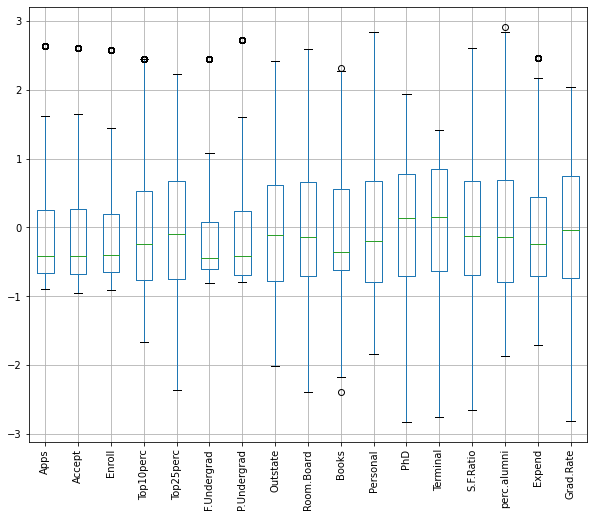

In [138]:
zscale.boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

Before PCA

In [142]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(zscaled)
p_value

0.0

In [143]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(zscale)
kmo_model

0.856169513793869

In [145]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(zscaled)
kmo_model

0.8131251200373506

In [149]:
cov_matrix = np.cov(zscaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

**Observing the scatter plot for 'S.F.Ratio' vs 'Expend' with and without scaling :**


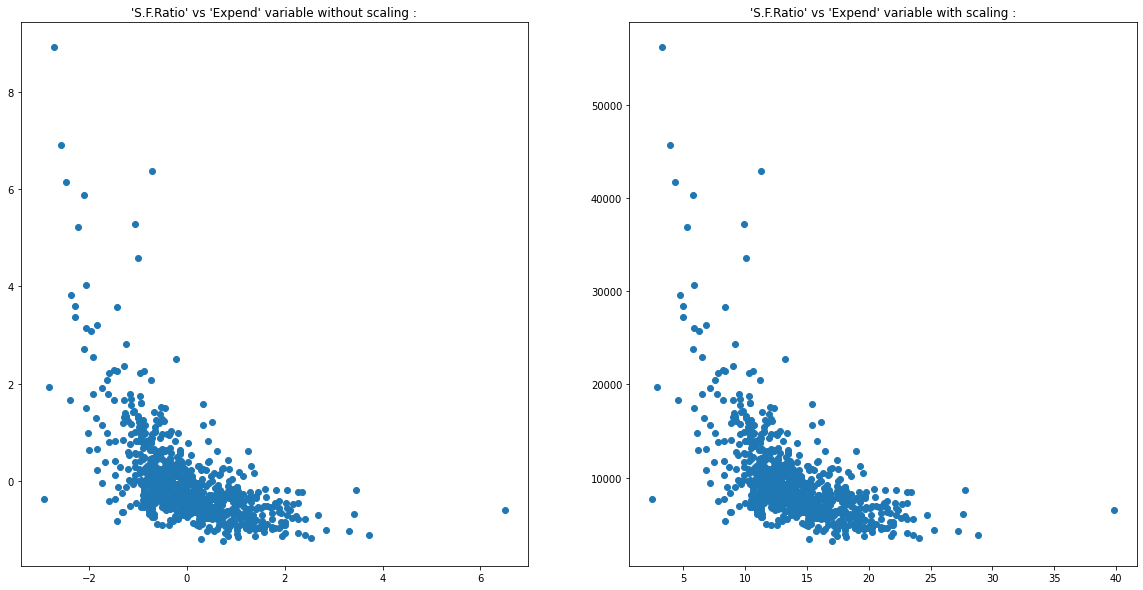

In [151]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(x = zscaled['S.F.Ratio'] , y = zscaled.Expend)
plt.title('\'S.F.Ratio\' vs \'Expend\' variable without scaling :')
plt.subplot(1,2,2)
plt.scatter(x = qd['S.F.Ratio'] , y = qd.Expend)
plt.title('\'S.F.Ratio\' vs \'Expend\' variable with scaling :')
print('**Observing the scatter plot for \'S.F.Ratio\' vs \'Expend\' with and without scaling :**')

In [152]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6

In [153]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


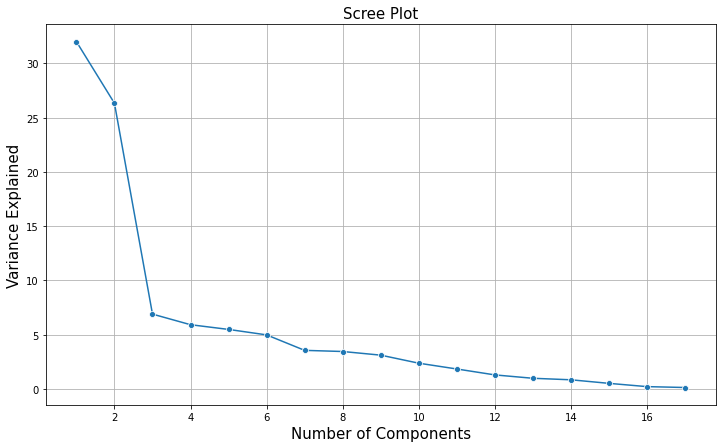

In [160]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

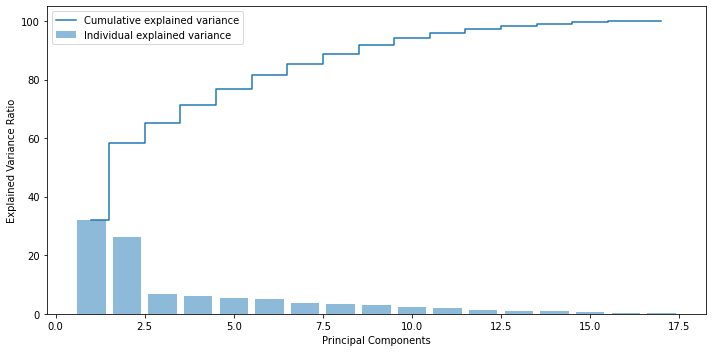

In [161]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Performing PCA

In [192]:
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(zscaled)
df_pca.transpose() # Component output

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 1.75239502e-03,  1.03709803e-01, -2.25582869e-02, ...,
         6.79013123e-02,  3.53597440e-01, -1.14873492e-01],
       [-9.31400698e-02, -5.02556890e-02, -4.05268301e-03, ...,
        -2.32023970e-01,  3.04416200e-01, -1.17076127e-01],
       [ 9.35522023e-02, -1.74057054e-01,  3.75875882e-03, ...,
        -9.99380421e-02,  3.35104811e-01, -2.57218339e-03]])

In [194]:
df_pca.shape

(777, 17)

In [204]:
pc1 = pca.components_[0]
print('**Eigen Vector corresponding to maximum Eigen value :**')
print(pc1)

**Eigen Vector corresponding to maximum Eigen value :**
[ 0.2487656   0.2076015   0.17630359  0.35427395  0.34400128  0.15464096
  0.0264425   0.29473642  0.24903045  0.06475752 -0.04252854  0.31831287
  0.31705602 -0.17695789  0.20508237  0.31890875  0.25231565]


In [187]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [207]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [209]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(zscaled))
df_pca_loading.shape

(17, 17)

In [220]:
df_pca_loading.head(10).T

,0,1,2,3,4,5,6,7,8,9
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029


In [212]:
print('**explicit form of the first PC in terms of the eigenvectors in two places of decimals :**')
var=np.cumsum(np.round(df_pca_loading, decimals=3)*100)
var

**explicit form of the first PC in terms of the eigenvectors in two places of decimals :**


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,24.9,20.8,17.6,35.4,34.4,15.5,2.6,29.5,24.9,6.5,-4.3,31.8,31.7,-17.7,20.5,31.9,25.2
1,58.1,58.0,58.0,27.2,29.9,57.3,34.1,4.5,11.1,12.1,17.7,37.6,36.3,7.0,-4.2,18.7,8.3
2,51.8,47.9,49.7,30.7,27.5,51.2,48.1,9.2,26.0,79.8,67.7,24.9,29.7,-22.0,-18.9,41.4,-12.5
3,79.9,74.7,65.9,25.5,16.5,61.2,32.2,22.3,44.5,88.5,44.6,-28.6,-22.2,-38.1,-17.2,49.3,14.4
4,80.5,80.3,60.3,-14.0,-26.2,56.9,62.4,44.6,100.6,75.8,22.4,-14.6,-1.7,-46.0,-38.8,56.9,3.5
5,78.9,81.1,56.0,-19.3,-22.9,52.6,43.3,41.6,116.9,139.9,-10.7,-5.5,13.8,2.7,-43.5,27.1,25.1
6,74.7,79.8,53.2,-35.4,-34.7,50.1,49.4,52.5,137.9,124.9,52.7,-5.6,11.0,24.6,-19.2,4.4,81.1
7,64.4,74.2,59.1,-47.7,-44.9,58.0,106.5,53.5,115.8,146.2,29.4,-13.3,9.8,16.2,48.7,-1.0,80.6
8,55.4,56.4,46.2,-13.6,-4.5,52.1,162.6,53.0,143.3,132.8,20.0,-31.8,-15.7,43.7,23.2,-5.9,84.8
9,60.7,60.5,49.6,-7.2,-3.0,54.2,140.3,71.7,173.1,124.6,33.6,-44.1,-24.6,90.9,65.5,7.3,25.8


In [224]:
print('The Linear eq of 1st component: ')
for i in range(0,qd.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],1),qd.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.2 * Apps + 0.2 * Accept + 0.2 * Enroll + 0.4 * Top10perc + 0.3 * Top25perc + 0.2 * F.Undergrad + 0.0 * P.Undergrad + 0.3 * Outstate + 0.2 * Room.Board + 0.1 * Books + -0.0 * Personal + 0.3 * PhD + 0.3 * Terminal + -0.2 * S.F.Ratio + 0.2 * perc.alumni + 0.3 * Expend + 0.3 * Grad.Rate + 

In [225]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


# Performing PCA Again with 5 Components

In [233]:
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 33 to 8)
pca1 = PCA(n_components=6, random_state=123)
qd_pca = pca1.fit_transform(zscaled)
qd_pca.transpose() # Component output

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352401e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073616e-01,  2.27879810e+00, -4.38092815e-01, ...,
        -4.05798710e-04,  2.07356387e+00, -1.32891523e+00],
       [-9.21749291e-01,  3.58891825e+00,  6.77240533e-01, ...,
         5.43164956e-02,  8.52053749e-01, -1.08022442e-01],
       [-7.43975435e-01,  1.05999660e+00, -3.69613276e-01, ...,
        -5.16021192e-01, -9.47754660e-01, -1.13217598e+00],
       [-2.98306092e-01, -1.77137311e-01, -9.60591689e-01, ...,
         4.68014225e-01, -2.06993735e+00,  8.39893075e-01]])

In [234]:
pca1.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.06309209, -0.10124907, -0.08298558,  0.03505553, -0.02414794,
        -0.06139296,  0.13968171,  0.04659888,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131052,  0.26781736,  0.16182679, -0.05154725, -0.10976654,
         0.10041231, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.0792735 

In [235]:
pca1.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701])

In [237]:
df_pca_loading1 = pd.DataFrame(pca1.components_,columns=list(zscaled))
df_pca_loading1.shape

(6, 17)

In [266]:
df_pca_loading1.head().T

,0,1,2,3,4
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919
Books,0.064758,0.056342,0.677412,0.087089,-0.127289


In [240]:
from matplotlib.patches import Rectangle

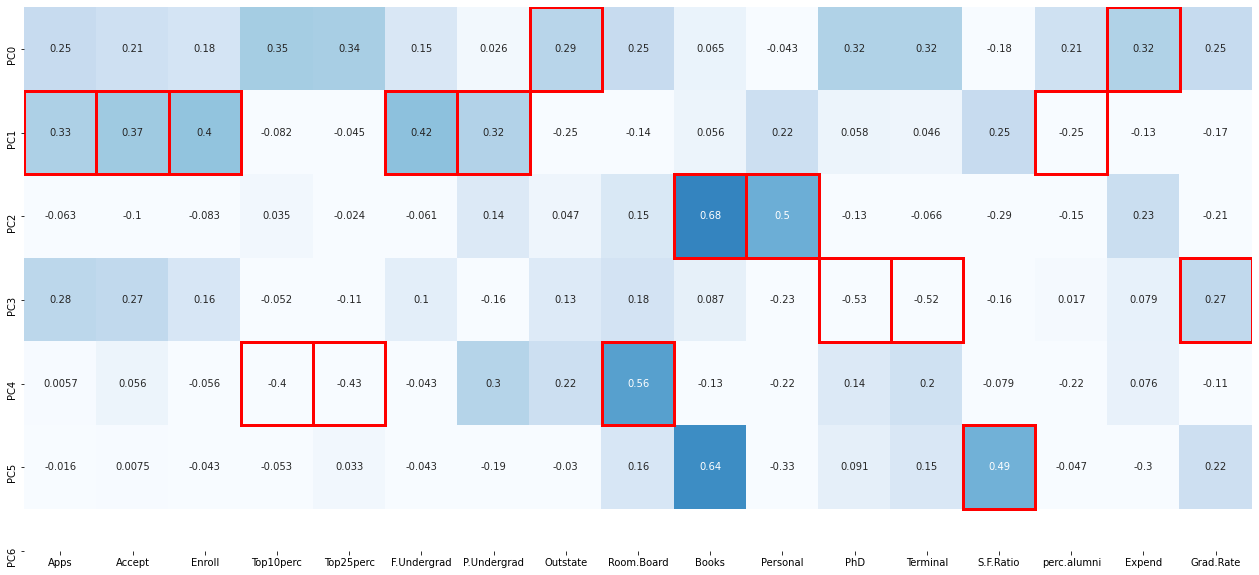

In [245]:
fig,ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading1, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5','PC6'])

column_max = df_pca_loading1.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading1.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))